In [1]:
# https://huggingface.co/docs/diffusers/using-diffusers/write_own_pipeline
from diffusers import DDPMPipeline

device='cuda:3'

# ddpm=DDPMPipeline.from_pretrained('google/ddpm-cat-256', use_safetensors=True).to('cuda')
ddpm=DDPMPipeline.from_pretrained('google/ddpm-cat-256').to(device)
images=ddpm(num_inference_steps=25).images

print(f'images.shape:{len(images)}, type:{type(images[0])}')
images[0]

ModuleNotFoundError: No module named 'diffusers'

In [37]:
import torch
from diffusers import DDPMScheduler, UNet2DModel

scheduler=DDPMScheduler.from_pretrained('google/ddpm-cat-256')
model=UNet2DModel.from_pretrained('google/ddpm-cat-256').to(device)

In [38]:
scheduler.set_timesteps(50)
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [39]:
sample_size=model.config.sample_size
print(f'sample_size:{sample_size}')
noise=torch.randn((1,3,sample_size,sample_size),device=device)

sample_size:256


In [40]:
input=noise
for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual=model(input,t).sample
    previous_noisy_residual=scheduler.step(noisy_residual,t,input).prev_sample
    input=previous_noisy_residual
    

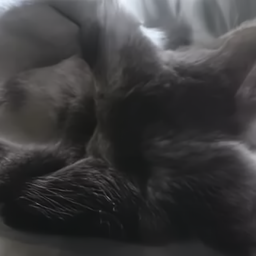

In [41]:
from PIL import Image
import numpy as np

image=(input/2+0.5).clamp(0,1.0).squeeze()
image=(image.permute(1,2,0)*255).round().to(torch.uint8).cpu().numpy()
image=Image.fromarray(image)
image